In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from methods import load_data, NeuralNet, loader_eval

In [4]:
# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [5]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
train_loader, test_loader = load_data()

In [7]:
# Train the model
train_loss_per_epoch = []
test_loss_per_epoch = []
for epoch in range(num_epochs):
    # Train
    # model.train()
    train_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_loss_per_epoch.append(train_loss)

    # Test
    # model.eval()
    test_loss = loader_eval(test_loader, model, criterion)
    test_loss_per_epoch.append(test_loss)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/5], Train Loss: 0.8032, Test Loss: 0.4681
Epoch [2/5], Train Loss: 0.3195, Test Loss: 0.3830
Epoch [3/5], Train Loss: 0.2442, Test Loss: 0.3571
Epoch [4/5], Train Loss: 0.2002, Test Loss: 0.3146
Epoch [5/5], Train Loss: 0.1600, Test Loss: 0.2972


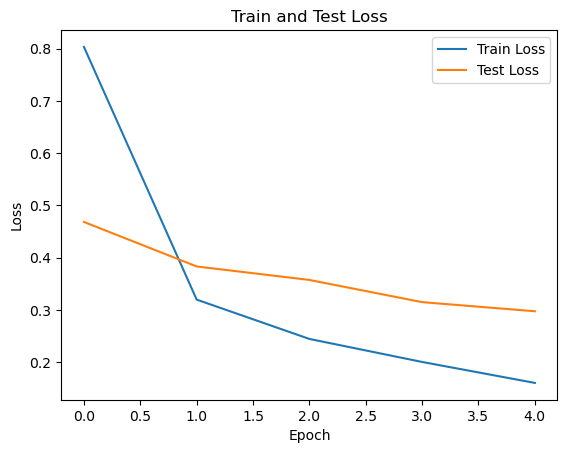

In [8]:
# Plot train and test loss
plt.plot(train_loss_per_epoch, label='Train Loss')
plt.plot(test_loss_per_epoch, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

In [9]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 91.08333333333333 %


In [10]:
test_error = loader_eval(test_loader, model, criterion)
print(f'Test error for trained model {test_error}')

Test error for trained model 0.29720718214909236


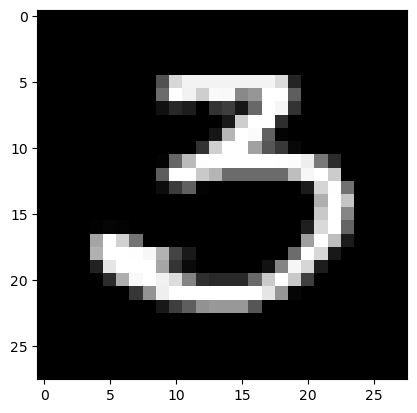

Predicted:  tensor(0)
Actual:  tensor(3)


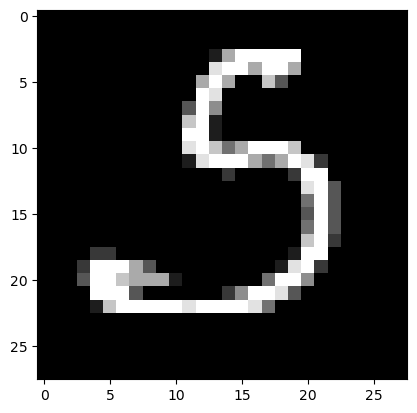

Predicted:  tensor(3)
Actual:  tensor(5)


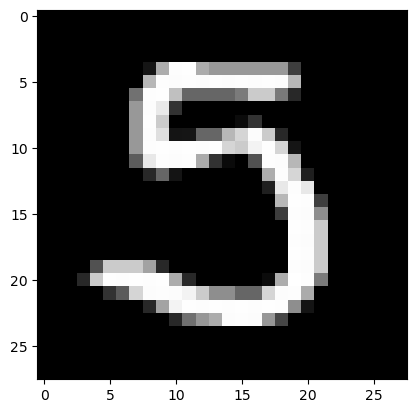

Predicted:  tensor(3)
Actual:  tensor(5)


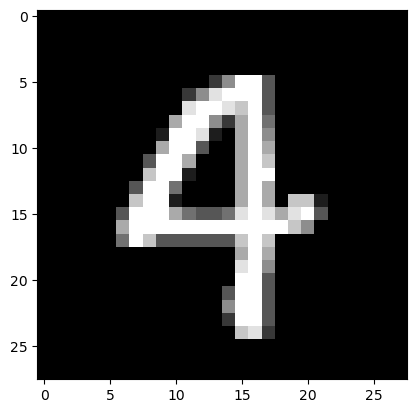

Predicted:  tensor(9)
Actual:  tensor(4)


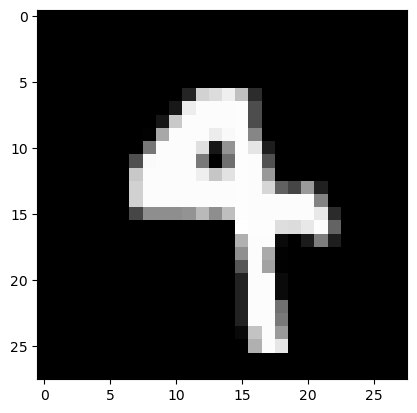

Predicted:  tensor(9)
Actual:  tensor(4)


In [11]:
imgs_to_show = 5

misclassified_images = (predicted != labels)
for index in np.where(misclassified_images)[0][:imgs_to_show]:
    #plot each misclassified image
    images[index].shape
    plt.imshow(images[index].reshape(28,28), cmap='gray')
    plt.show()
    print("Predicted: ", predicted[index])
    print("Actual: ", labels[index])